In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("happyscore_income.csv")
#remove duplicate country column
df = df.drop(columns=['country.1'])

print(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

This dataset contains 111 rows and 10 columns.


,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358


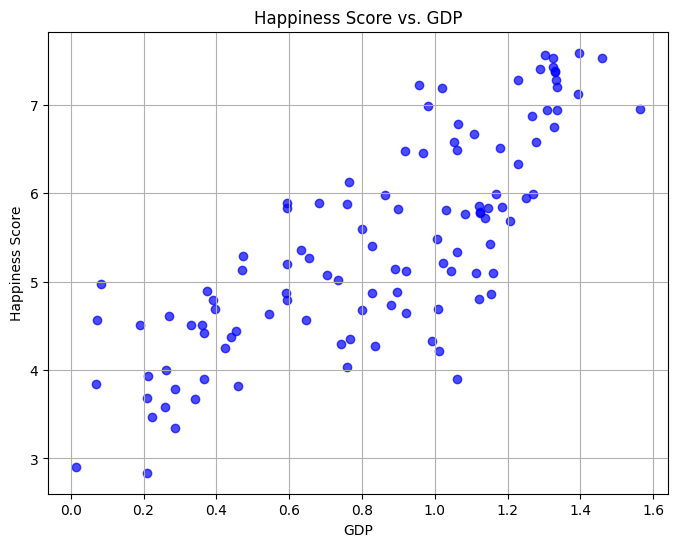

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GDP'], df['happyScore'], color='blue', alpha=0.7)
plt.title('Happiness Score vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Happiness Score')
plt.grid()
plt.show()

In [4]:
#creates 2-dimensional X for sklearn to process 
X = df[['GDP']]
y = df['happyScore']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.59
R-squared (R²): 0.55


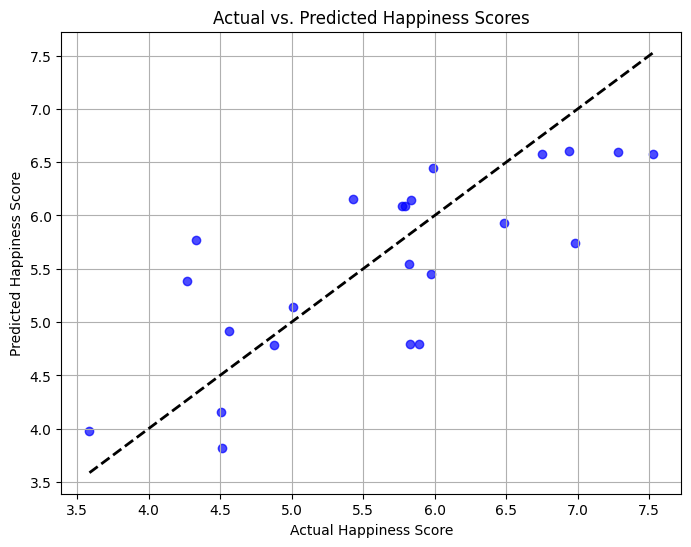

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Scores')
plt.grid()
plt.show()

In [6]:
sample_df = pd.DataFrame({
    'Country': X_test.index.map(lambda idx: df.loc[idx, 'country']),
    'GDP': X_test['GDP'].values,
    'Actual_Happiness': y_test.values,
    'Predicted_Happiness': y_pred
})

sample_df['Residual'] = abs(sample_df['Actual_Happiness'] - sample_df['Predicted_Happiness'])
threshold = 1.0

misclassified_samples = sample_df[sample_df['Residual'] > threshold]
print("\nMisclassified Samples:")
print(misclassified_samples)


Misclassified Samples:
      Country      GDP  Actual_Happiness  Predicted_Happiness  Residual
0   Sri Lanka  0.83524             4.271             5.383348  1.112348
12     Brazil  0.98124             6.983             5.738244  1.244756
16    Moldova  0.59448             5.889             4.798109  1.090891
19  Nicaragua  0.59325             5.828             4.795119  1.032881
20   Botswana  0.99355             4.332             5.768168  1.436168
